### **Objective** ###

To analyze customer satisfaction survey data in order to identify key drivers of satisfaction, compare performance
across campaigns and channels, and track trends over time for improving customer experience.

### **Import libraries** ###

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt



In [2]:
import sqlite3
import warnings
warnings.filterwarnings('ignore')

### **Database connection** ###

In [3]:
df = pd.read_csv(r"C:\Users\Jyoti\Desktop\Survey\Customer_Satisfaction_Survey.csv")

### **Exploratory data analysis and data cleaning** ###

In [4]:
df

,Year,Campaign,Channel,Survey Type,Start Date,Start Time,Completion Date,Completion Time,Survey Language,Overall Satisfaction,Wait Time,Agent - Customer Service,Agent - Job Knowledge,Answer Satisfaction,NPS,Total Time Required,Time Category
0,2021,Campaign 5,NYC311 Call Center,Customer Satisfaction (CSAT) Survey,08-12-2021,15:09:00,08-12-2021,15:18:00,English (United States),Agree,Agree,Agree,Agree,Disagree,7,00:09:00,Fast
1,2021,Campaign 5,NYC311 Call Center,Customer Satisfaction (CSAT) Survey,13-12-2021,09:17:09,13-12-2021,09:19:31,English (United States),Agree,Agree,Agree,Neutral,Neutral,7,00:02:22,Very Fast
2,2022,Campaign 2,NYC311 Call Center,Customer Satisfaction (CSAT) Survey,17-03-2022,13:12:59,17-03-2022,13:14:57,English (United States),Agree,Agree,Agree,Agree,Neutral,8,00:01:58,Very Fast
3,2022,Campaign 2,NYC311 Call Center,Customer Satisfaction (CSAT) Survey,17-03-2022,13:46:58,17-03-2022,13:48:40,English (United States),Strongly Agree,Agree,Agree,Agree,Agree,10,00:01:42,Very Fast
4,2022,Campaign 4,NYC311 Call Center,Customer Satisfaction (CSAT) Survey,28-09-2022,17:09:18,28-09-2022,17:14:02,English (United States),Agree,Agree,Strongly Agree,Agree,Agree,9,00:04:44,Very Fast
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22727,2024,Campaign 5,NYC311 Call Center,Customer Satisfaction (CSAT) Survey,25-11-2024,18:12:12,25-11-2024,18:15:09,English (United States),Strongly Disagree,Strongly Disagree,Strongly Disagree,Strongly Disagree,Strongly Disagree,10,00:02:57,Very Fast
22728,2024,Campaign 5,NYC311 Call Center,Customer Satisfaction (CSAT) Survey,25-11-2024,21:32:16,25-11-2024,21:34:07,English (United States),Agree,Agree,Agree,Agree,Neutral,7,00:01:51,Very Fast
22729,2024,Campaign 5,NYC311 Call Center,Customer Satisfaction (CSAT) Survey,28-11-2024,00:54:59,28-11-2024,01:05:18,English (United States),Neutral,Neutral,Neutral,Neutral,Disagree,7,00:10:19,Fast
22730,2024,Campaign 5,NYC311 Call Center,Customer Satisfaction (CSAT) Survey,29-11-2024,10:47:56,29-11-2024,10:55:22,"Spanish (Spain, International Literacy)",Neutral,Agree,Disagree,Strongly Disagree,Disagree,2,00:07:26,Fast


In [5]:
df.head()

,Year,Campaign,Channel,Survey Type,Start Date,Start Time,Completion Date,Completion Time,Survey Language,Overall Satisfaction,Wait Time,Agent - Customer Service,Agent - Job Knowledge,Answer Satisfaction,NPS,Total Time Required,Time Category
0,2021,Campaign 5,NYC311 Call Center,Customer Satisfaction (CSAT) Survey,08-12-2021,15:09:00,08-12-2021,15:18:00,English (United States),Agree,Agree,Agree,Agree,Disagree,7,00:09:00,Fast
1,2021,Campaign 5,NYC311 Call Center,Customer Satisfaction (CSAT) Survey,13-12-2021,09:17:09,13-12-2021,09:19:31,English (United States),Agree,Agree,Agree,Neutral,Neutral,7,00:02:22,Very Fast
2,2022,Campaign 2,NYC311 Call Center,Customer Satisfaction (CSAT) Survey,17-03-2022,13:12:59,17-03-2022,13:14:57,English (United States),Agree,Agree,Agree,Agree,Neutral,8,00:01:58,Very Fast
3,2022,Campaign 2,NYC311 Call Center,Customer Satisfaction (CSAT) Survey,17-03-2022,13:46:58,17-03-2022,13:48:40,English (United States),Strongly Agree,Agree,Agree,Agree,Agree,10,00:01:42,Very Fast
4,2022,Campaign 4,NYC311 Call Center,Customer Satisfaction (CSAT) Survey,28-09-2022,17:09:18,28-09-2022,17:14:02,English (United States),Agree,Agree,Strongly Agree,Agree,Agree,9,00:04:44,Very Fast


In [6]:
df.tail()

,Year,Campaign,Channel,Survey Type,Start Date,Start Time,Completion Date,Completion Time,Survey Language,Overall Satisfaction,Wait Time,Agent - Customer Service,Agent - Job Knowledge,Answer Satisfaction,NPS,Total Time Required,Time Category
22727,2024,Campaign 5,NYC311 Call Center,Customer Satisfaction (CSAT) Survey,25-11-2024,18:12:12,25-11-2024,18:15:09,English (United States),Strongly Disagree,Strongly Disagree,Strongly Disagree,Strongly Disagree,Strongly Disagree,10,00:02:57,Very Fast
22728,2024,Campaign 5,NYC311 Call Center,Customer Satisfaction (CSAT) Survey,25-11-2024,21:32:16,25-11-2024,21:34:07,English (United States),Agree,Agree,Agree,Agree,Neutral,7,00:01:51,Very Fast
22729,2024,Campaign 5,NYC311 Call Center,Customer Satisfaction (CSAT) Survey,28-11-2024,00:54:59,28-11-2024,01:05:18,English (United States),Neutral,Neutral,Neutral,Neutral,Disagree,7,00:10:19,Fast
22730,2024,Campaign 5,NYC311 Call Center,Customer Satisfaction (CSAT) Survey,29-11-2024,10:47:56,29-11-2024,10:55:22,"Spanish (Spain, International Literacy)",Neutral,Agree,Disagree,Strongly Disagree,Disagree,2,00:07:26,Fast
22731,2024,Campaign 5,NYC311 Call Center,Customer Satisfaction (CSAT) Survey,12-12-2024,13:34:00,12-12-2024,13:38:00,English (United States),Agree,Disagree,Strongly Agree,Strongly Agree,Strongly Agree,5,00:04:00,Very Fast


In [7]:
df.shape

(22732, 17)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22732 entries, 0 to 22731
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Year                      22732 non-null  int64 
 1   Campaign                  22732 non-null  object
 2   Channel                   22732 non-null  object
 3   Survey Type               22732 non-null  object
 4   Start Date                22732 non-null  object
 5   Start Time                22732 non-null  object
 6   Completion Date           22732 non-null  object
 7   Completion Time           22732 non-null  object
 8   Survey Language           22732 non-null  object
 9   Overall Satisfaction      22732 non-null  object
 10  Wait Time                 22732 non-null  object
 11  Agent - Customer Service  22732 non-null  object
 12  Agent - Job Knowledge     22732 non-null  object
 13  Answer Satisfaction       22732 non-null  object
 14  NPS                   

In [9]:
df.describe()

,Year,NPS
count,22732.000000,22732.000000
mean,2022.531805,8.410127
std,1.205511,2.696220
min,2020.000000,0.000000
25%,2022.000000,8.000000
50%,2023.000000,10.000000
75%,2024.000000,10.000000
max,2024.000000,10.000000


In [10]:
df.isnull().sum()

Year                        0
Campaign                    0
Channel                     0
Survey Type                 0
Start Date                  0
Start Time                  0
Completion Date             0
Completion Time             0
Survey Language             0
Overall Satisfaction        0
Wait Time                   0
Agent - Customer Service    0
Agent - Job Knowledge       0
Answer Satisfaction         0
NPS                         0
Total Time Required         0
Time Category               0
dtype: int64

In [11]:
df.columns.tolist()


['Year',
 'Campaign',
 'Channel',
 'Survey Type',
 'Start Date',
 'Start Time',
 'Completion Date',
 'Completion Time',
 'Survey Language',
 'Overall Satisfaction',
 'Wait Time',
 'Agent - Customer Service',
 'Agent - Job Knowledge',
 'Answer Satisfaction',
 'NPS',
 'Total Time Required',
 'Time Category']

### **Data analysis and Visualization** ###

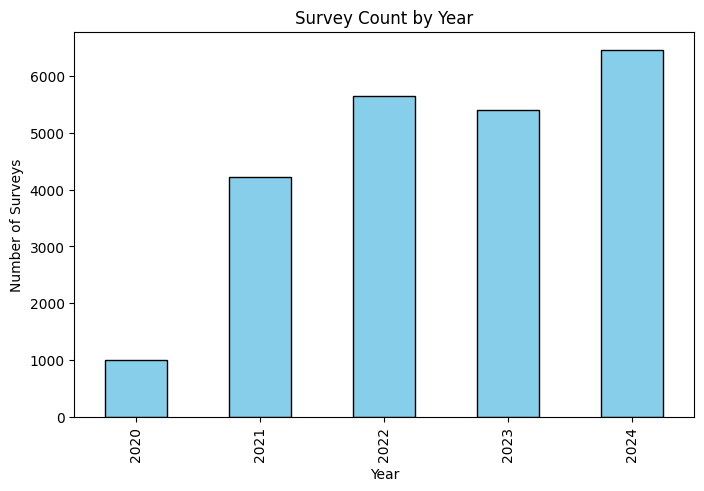

In [12]:
year_counts = df['Year'].value_counts().sort_index()

plt.figure(figsize=(8,5))
year_counts.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Survey Count by Year")
plt.xlabel("Year")
plt.ylabel("Number of Surveys")
plt.show()



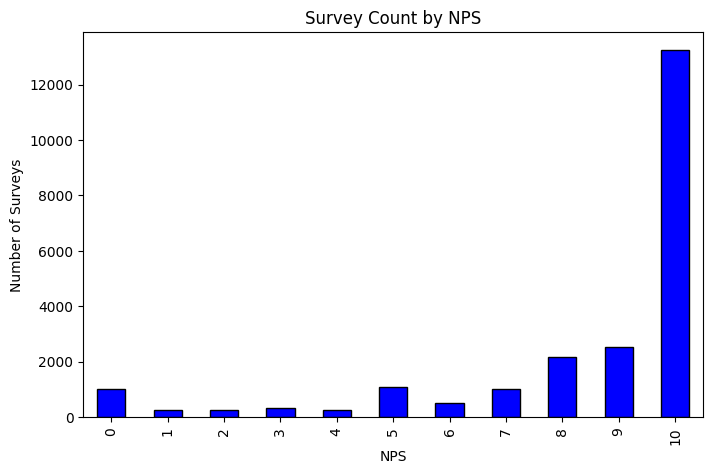

In [13]:
year_counts = df['NPS'].value_counts().sort_index()

plt.figure(figsize=(8,5))
year_counts.plot(kind="bar", color="blue", edgecolor="black")
plt.title("Survey Count by NPS")
plt.xlabel("NPS")
plt.ylabel("Number of Surveys")
plt.show()



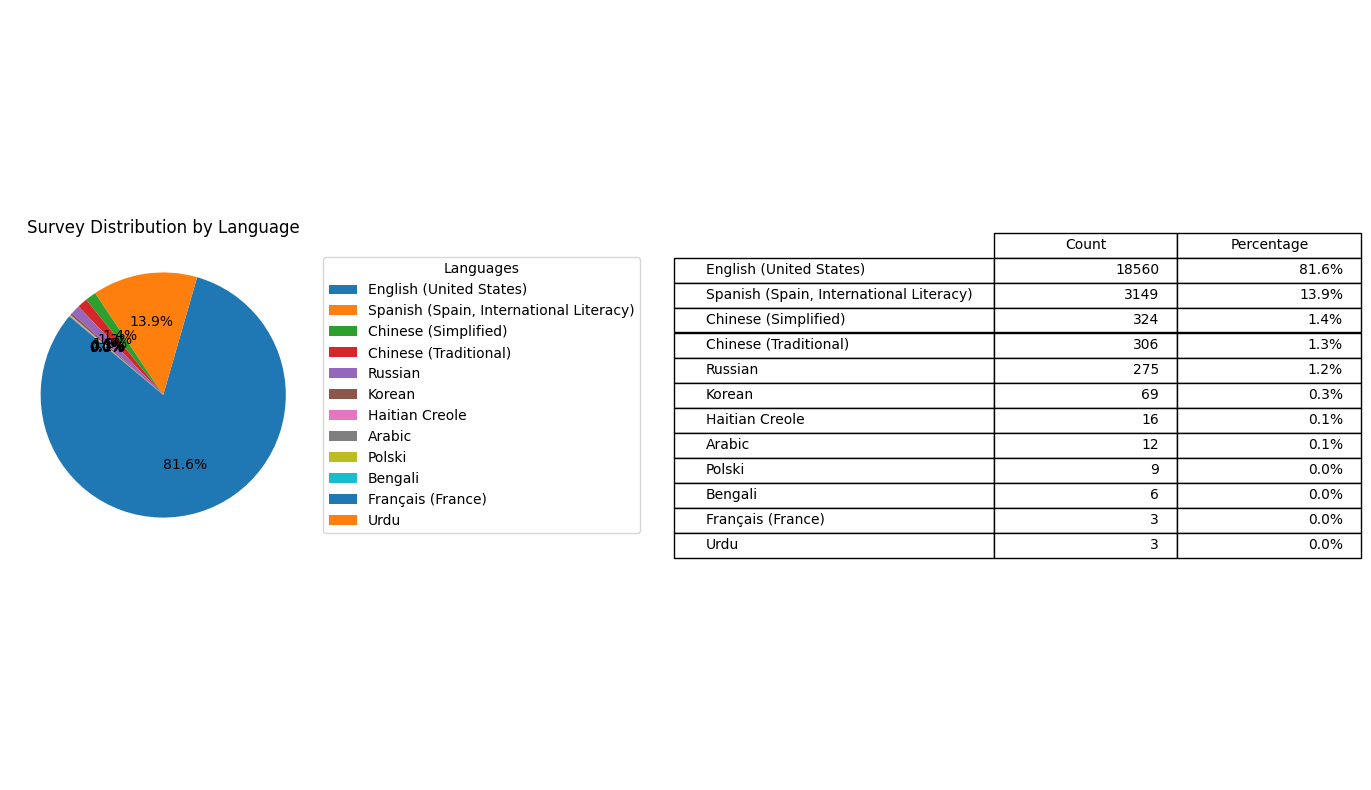

In [14]:
# Count languages (fix column name if different)
lang_counts = df['Survey Language'].value_counts()

# Convert to DataFrame for table
lang_df = pd.DataFrame({
    "Count": lang_counts,
    "Percentage": (lang_counts / lang_counts.sum() * 100).round(1).astype(str) + "%"
})

# Plot pie chart and table
fig, ax = plt.subplots(1, 2, figsize=(14, 8))
# Left: Pie chart
ax[0].pie(lang_counts, autopct='%1.1f%%', startangle=140)
ax[0].legend(lang_counts.index, title="Languages", bbox_to_anchor=(1, 0.5), loc="center left")
ax[0].set_title("Survey Distribution by Language")
# Right: Table
ax[1].axis("off")
table = ax[1].table(cellText=lang_df.values,
                    rowLabels=lang_df.index,
                    colLabels=lang_df.columns,
                    loc="center")
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)
plt.tight_layout()
plt.show()


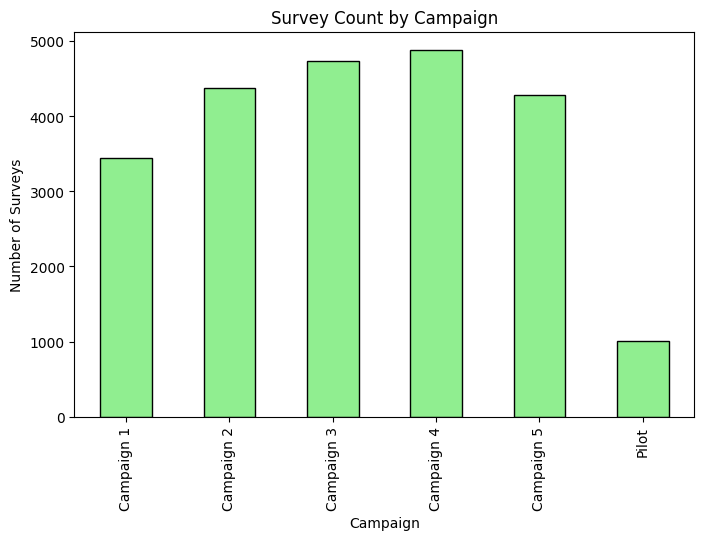

In [15]:
year_counts = df['Campaign'].value_counts().sort_index()

plt.figure(figsize=(8,5))
year_counts.plot(kind="bar", color="lightgreen", edgecolor="black")
plt.title("Survey Count by Campaign")
plt.xlabel("Campaign")
plt.ylabel("Number of Surveys")
plt.show()



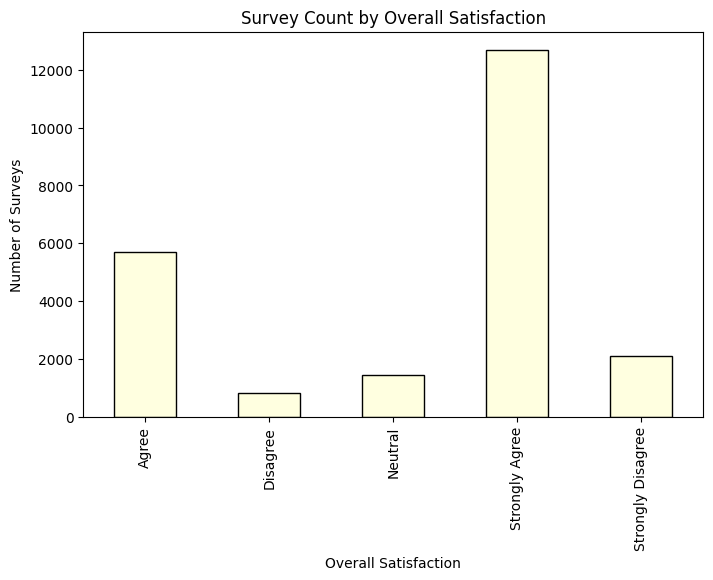

In [16]:
year_counts = df['Overall Satisfaction'].value_counts().sort_index()

plt.figure(figsize=(8,5))
year_counts.plot(kind="bar", color="lightyellow", edgecolor="black")
plt.title("Survey Count by Overall Satisfaction")
plt.xlabel("Overall Satisfaction")
plt.ylabel("Number of Surveys")
plt.show()



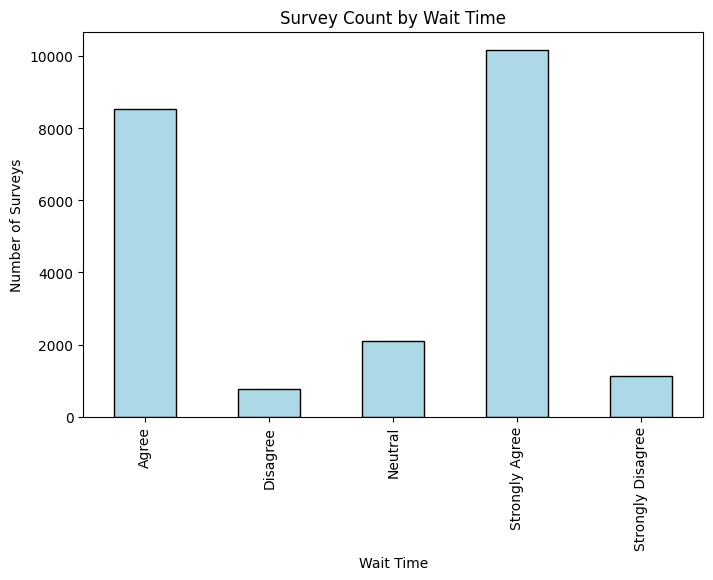

In [17]:
year_counts = df['Wait Time'].value_counts().sort_index()

plt.figure(figsize=(8,5))
year_counts.plot(kind="bar", color="lightblue", edgecolor="black")
plt.title("Survey Count by Wait Time")
plt.xlabel("Wait Time")
plt.ylabel("Number of Surveys")
plt.show()



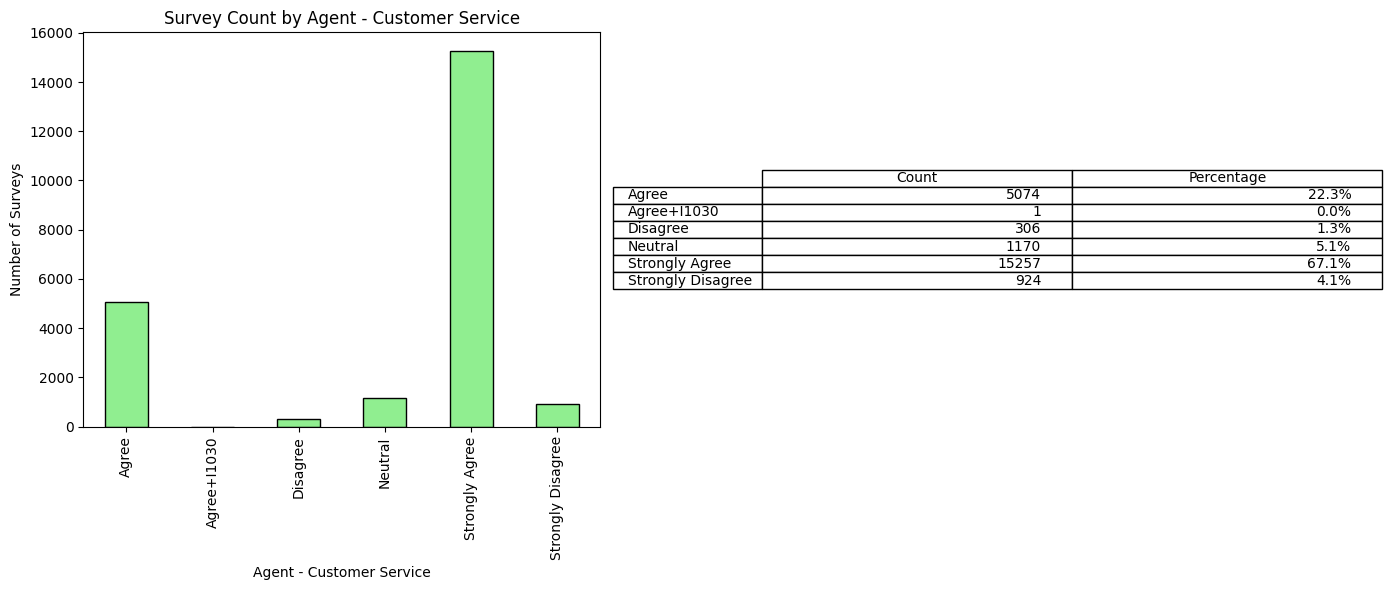

In [18]:
# Count values
agent_counts = df['Agent - Customer Service'].value_counts().sort_index()

# Convert to DataFrame for table
agent_df = pd.DataFrame({
    "Count": agent_counts,
    "Percentage": (agent_counts / agent_counts.sum() * 100).round(1).astype(str) + "%"
})

# Plot side by side (Bar chart + Table)
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Left: Bar Chart
agent_counts.plot(kind="bar", color="lightgreen", edgecolor="black", ax=ax[0])
ax[0].set_title("Survey Count by Agent - Customer Service")
ax[0].set_xlabel("Agent - Customer Service")
ax[0].set_ylabel("Number of Surveys")

# Right: Table
ax[1].axis("off")  
table = ax[1].table(cellText=agent_df.values,
                    rowLabels=agent_df.index,
                    colLabels=agent_df.columns,
                    loc="center")

table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)  

plt.tight_layout()
plt.show()


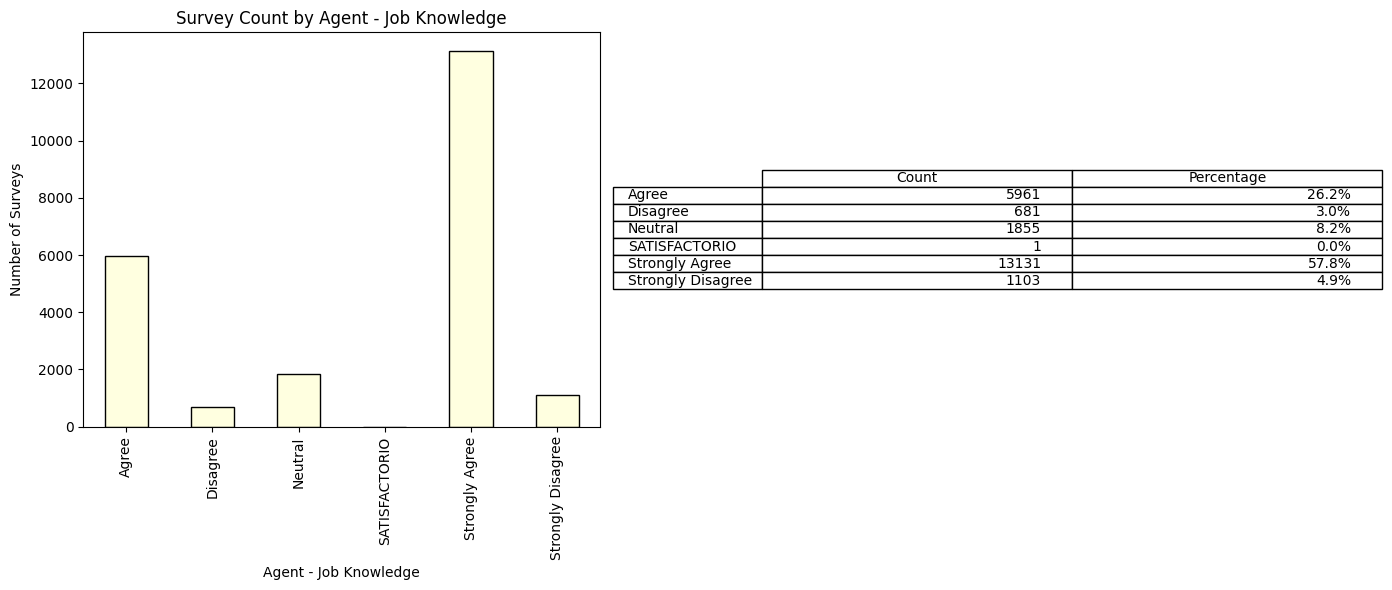

In [19]:


# Count values
job_counts = df['Agent - Job Knowledge'].value_counts().sort_index()

# Convert to DataFrame for table
job_df = pd.DataFrame({
    "Count": job_counts,
    "Percentage": (job_counts / job_counts.sum() * 100).round(1).astype(str) + "%"
})

# Plot side by side (Bar chart + Table)
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Left: Bar Chart
job_counts.plot(kind="bar", color="lightyellow", edgecolor="black", ax=ax[0])
ax[0].set_title("Survey Count by Agent - Job Knowledge")
ax[0].set_xlabel("Agent - Job Knowledge")
ax[0].set_ylabel("Number of Surveys")

# Right: Table
ax[1].axis("off")  
table = ax[1].table(cellText=job_df.values,
                    rowLabels=job_df.index,
                    colLabels=job_df.columns,
                    loc="center")

table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)  # adjust table size

plt.tight_layout()
plt.show()


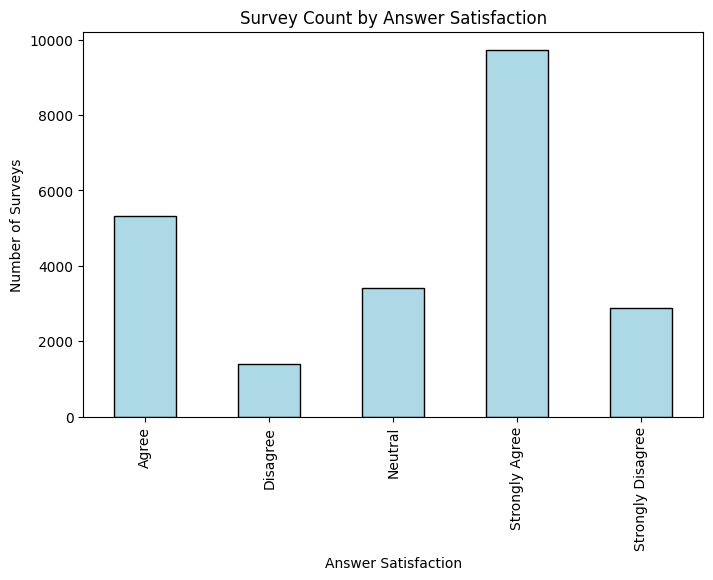

In [20]:
year_counts = df['Answer Satisfaction'].value_counts().sort_index()

plt.figure(figsize=(8,5))
year_counts.plot(kind="bar", color="lightblue", edgecolor="black")
plt.title("Survey Count by Answer Satisfaction")
plt.xlabel("Answer Satisfaction")
plt.ylabel("Number of Surveys")
plt.show()



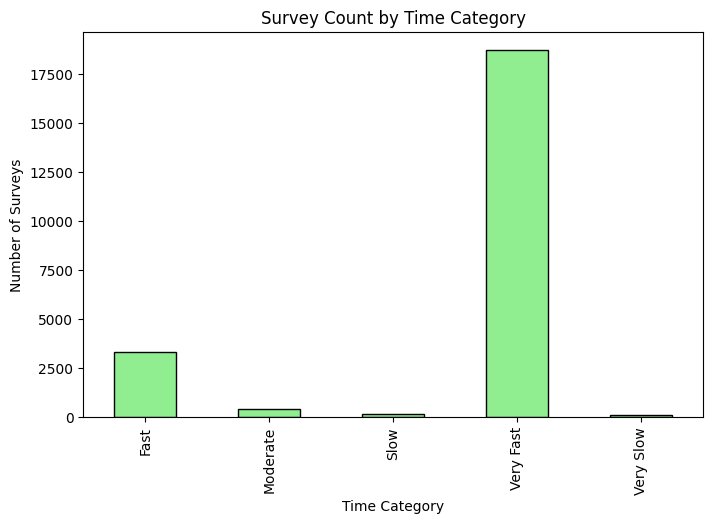

In [21]:
year_counts = df['Time Category'].value_counts().sort_index()

plt.figure(figsize=(8,5))
year_counts.plot(kind="bar", color="lightgreen", edgecolor="black")
plt.title("Survey Count by Time Category")
plt.xlabel("Time Category")
plt.ylabel("Number of Surveys")
plt.show()



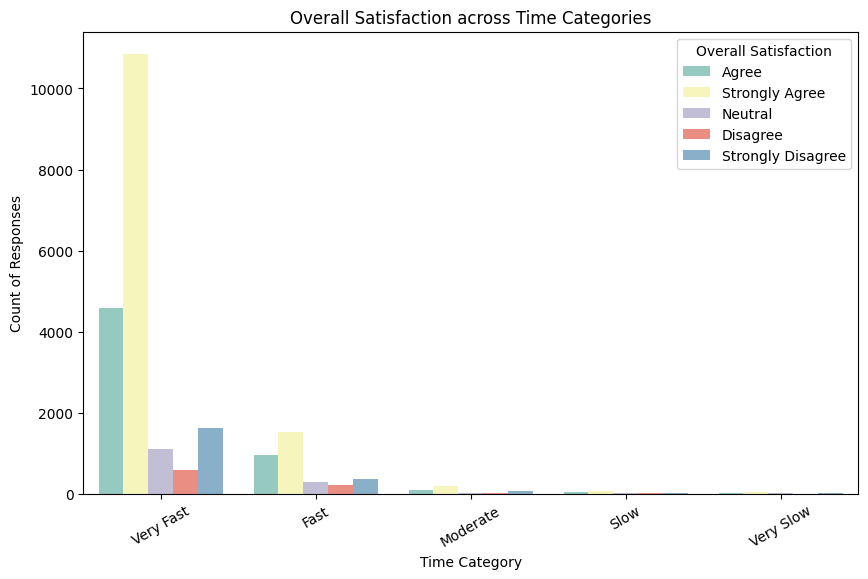

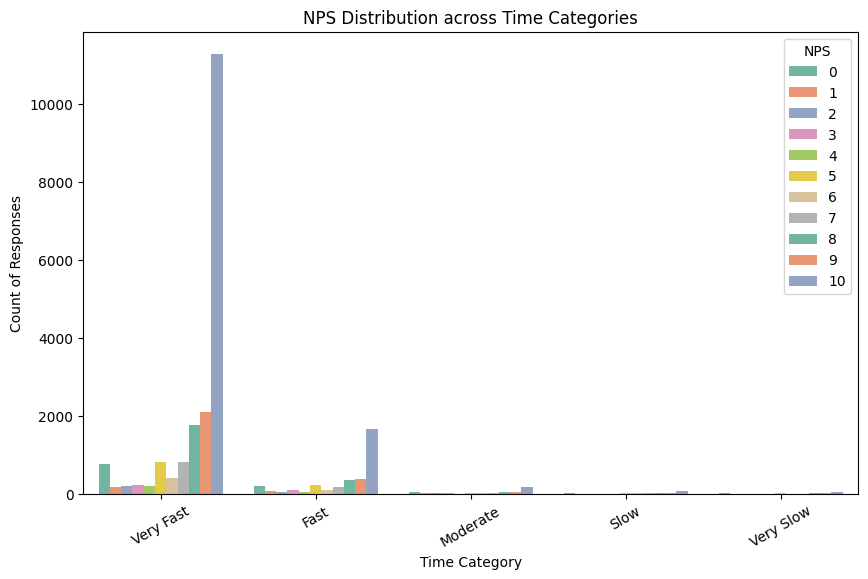

In [22]:
# --- Countplot 1: Overall Satisfaction by Time Category ---
plt.figure(figsize=(10,6))
sns.countplot(x="Time Category", hue="Overall Satisfaction", data=df,
              order=["Very Fast","Fast","Moderate","Slow","Very Slow"], palette="Set3")
plt.title("Overall Satisfaction across Time Categories")
plt.xlabel("Time Category")
plt.ylabel("Count of Responses")
plt.xticks(rotation=30)
plt.show()

# --- Countplot 2: NPS by Time Category ---
plt.figure(figsize=(10,6))
sns.countplot(x="Time Category", hue="NPS", data=df,
              order=["Very Fast","Fast","Moderate","Slow","Very Slow"], palette="Set2")
plt.title("NPS Distribution across Time Categories")
plt.xlabel("Time Category")
plt.ylabel("Count of Responses")
plt.xticks(rotation=30)
plt.show()


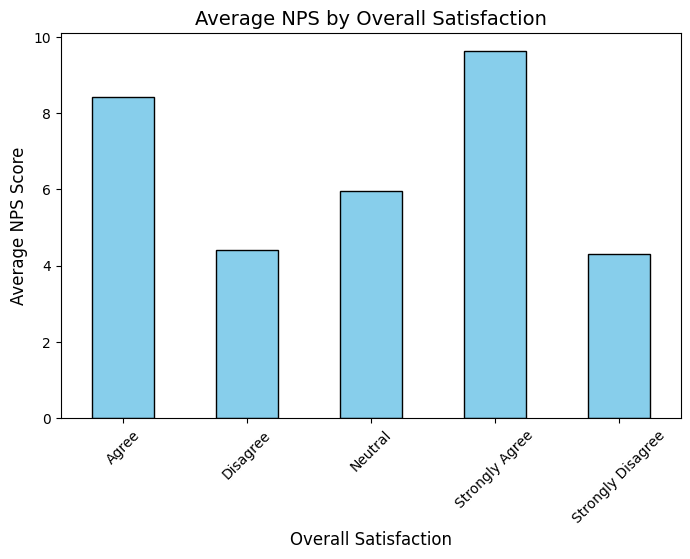

In [23]:

avg_nps = df.groupby("Overall Satisfaction")["NPS"].mean().sort_index()

# Plot bar chart
plt.figure(figsize=(8,5))
avg_nps.plot(kind="bar", color="skyblue", edgecolor="black")

plt.title("Average NPS by Overall Satisfaction", fontsize=14)
plt.xlabel("Overall Satisfaction", fontsize=12)
plt.ylabel("Average NPS Score", fontsize=12)
plt.xticks(rotation=45)
plt.show()


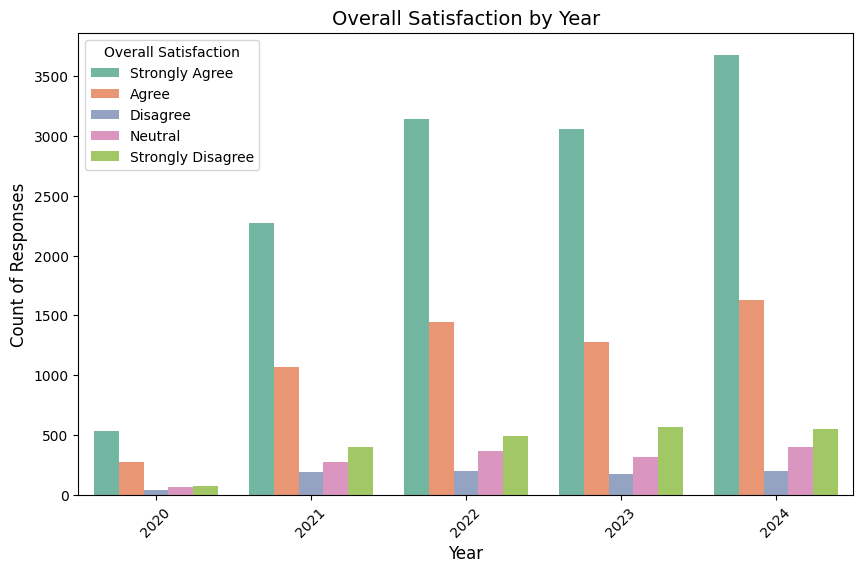

In [24]:
plt.figure(figsize=(10,6))
sns.countplot(x="Year", hue="Overall Satisfaction", data=df, palette="Set2")

plt.title("Overall Satisfaction by Year", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Count of Responses", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Overall Satisfaction")
plt.show()


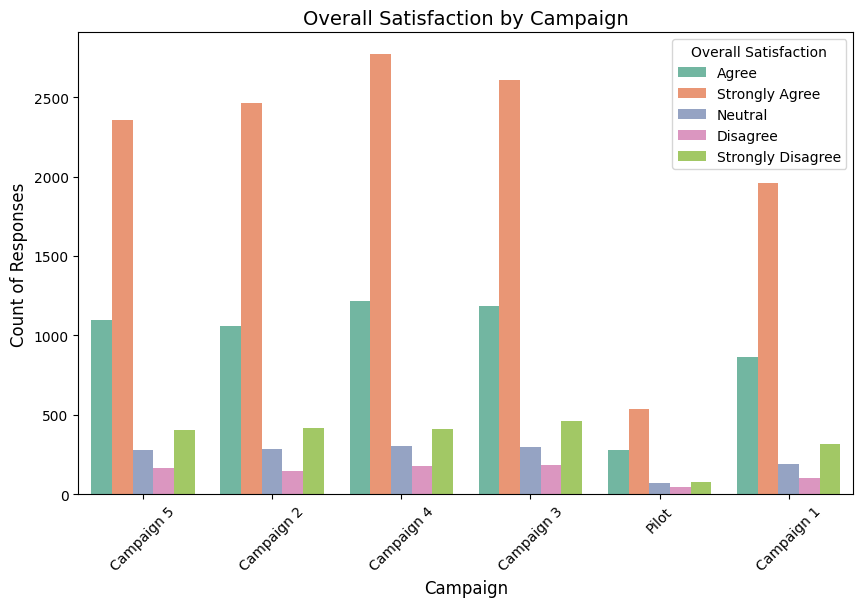

In [25]:
plt.figure(figsize=(10,6))
sns.countplot(x="Campaign", hue="Overall Satisfaction", data=df, palette="Set2")

plt.title("Overall Satisfaction by Campaign", fontsize=14)
plt.xlabel("Campaign", fontsize=12)
plt.ylabel("Count of Responses", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Overall Satisfaction")
plt.show()


In [26]:
df.columns = df.columns.str.strip()


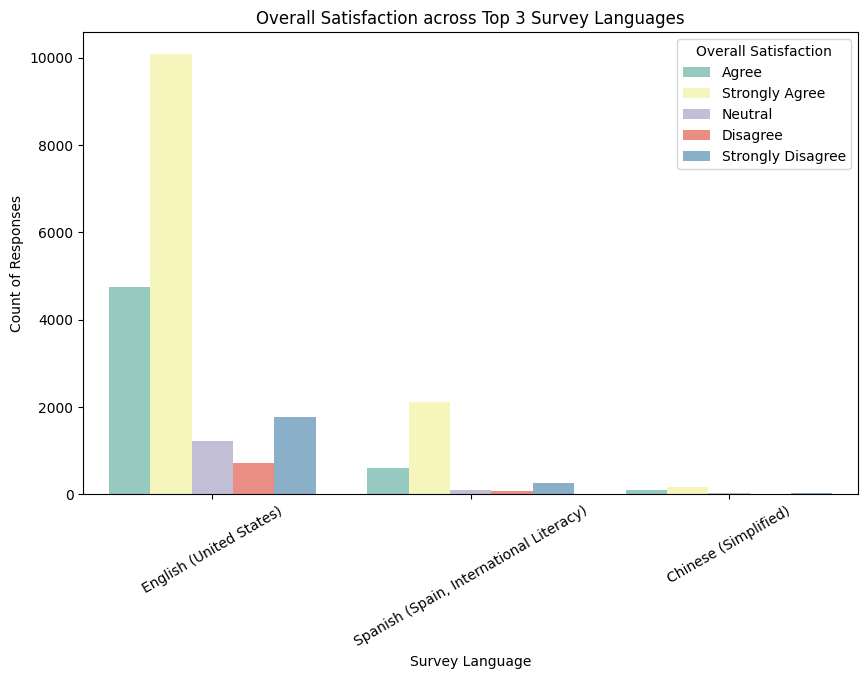

In [27]:
top_languages = df["Survey Language"].value_counts().nlargest(3).index


df_top_lang = df[df["Survey Language"].isin(top_languages)]


plt.figure(figsize=(10,6))
sns.countplot(x="Survey Language", hue="Overall Satisfaction", data=df_top_lang, palette="Set3")
plt.title("Overall Satisfaction across Top 3 Survey Languages")
plt.xlabel("Survey Language")
plt.ylabel("Count of Responses")
plt.xticks(rotation=30)
plt.show()


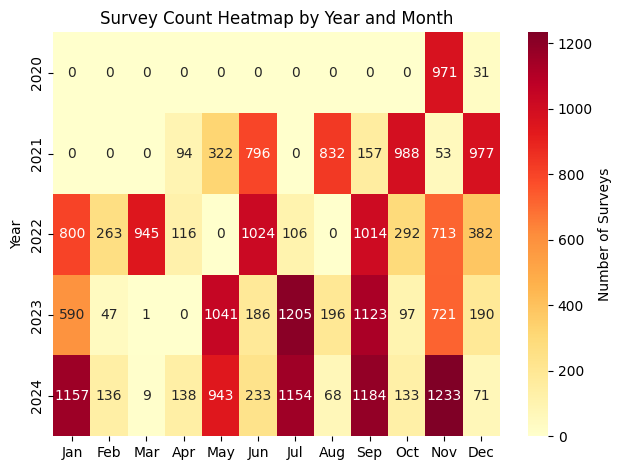

In [28]:
# Convert 'Start Date' to datetime, using dayfirst for DD-MM-YYYY format
df['Start Date'] = pd.to_datetime(df['Start Date'], dayfirst=True, errors='coerce')

# Extract year and month
df['Year'] = df['Start Date'].dt.year
df['Month'] = df['Start Date'].dt.month

month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

heatmap_data = df.groupby(['Year', 'Month']).size().unstack(fill_value=0)
heatmap_data.columns = [month_names[i-1] for i in heatmap_data.columns]
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='YlOrRd', cbar_kws={'label': 'Number of Surveys'})
plt.title('Survey Count Heatmap by Year and Month')
plt.tight_layout()
plt.show()


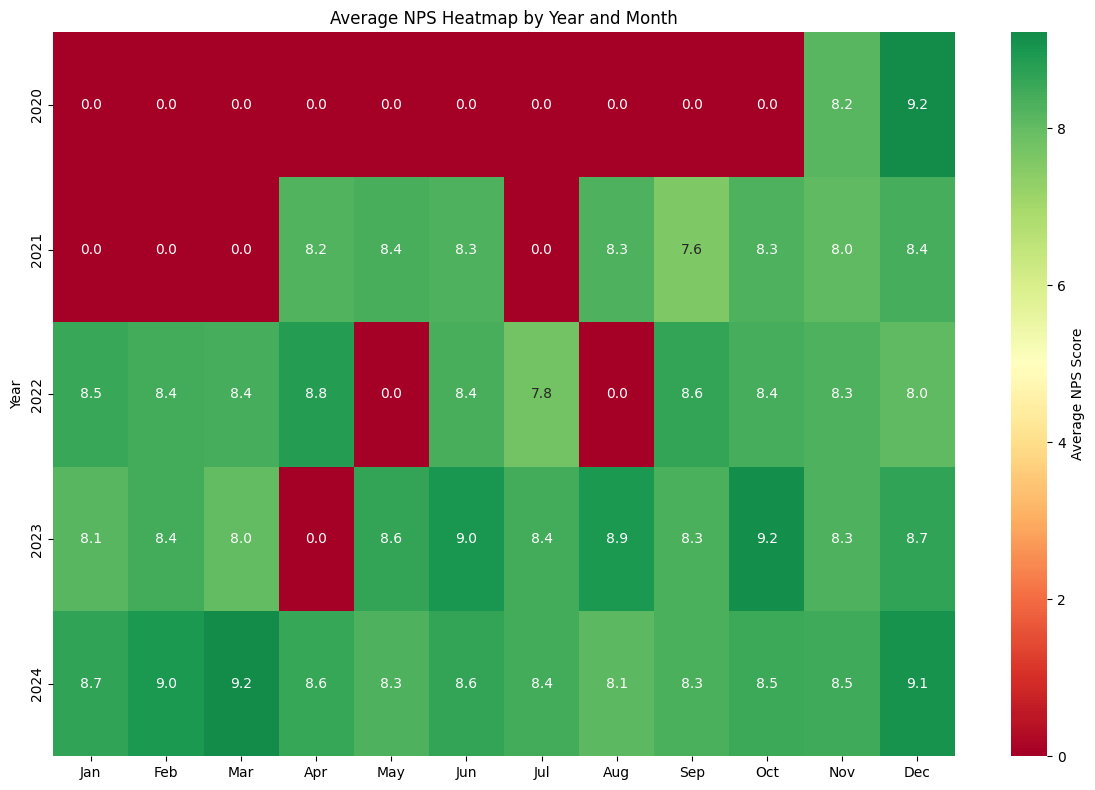

In [29]:
df['Start Date'] = pd.to_datetime(df['Start Date'], dayfirst=True, errors='coerce')
df['Year'] = df['Start Date'].dt.year
df['Month'] = df['Start Date'].dt.month

plt.figure(figsize=(12, 8))
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
nps_heatmap_data = df.groupby(['Year', 'Month'])['NPS'].mean().unstack(fill_value=0)
nps_heatmap_data.columns = [month_names[int(i)-1] for i in nps_heatmap_data.columns]

sns.heatmap(nps_heatmap_data, annot=True, fmt='.1f', cmap='RdYlGn', 
            center=5, cbar_kws={'label': 'Average NPS Score'})
plt.title('Average NPS Heatmap by Year and Month')
plt.tight_layout()
plt.show()


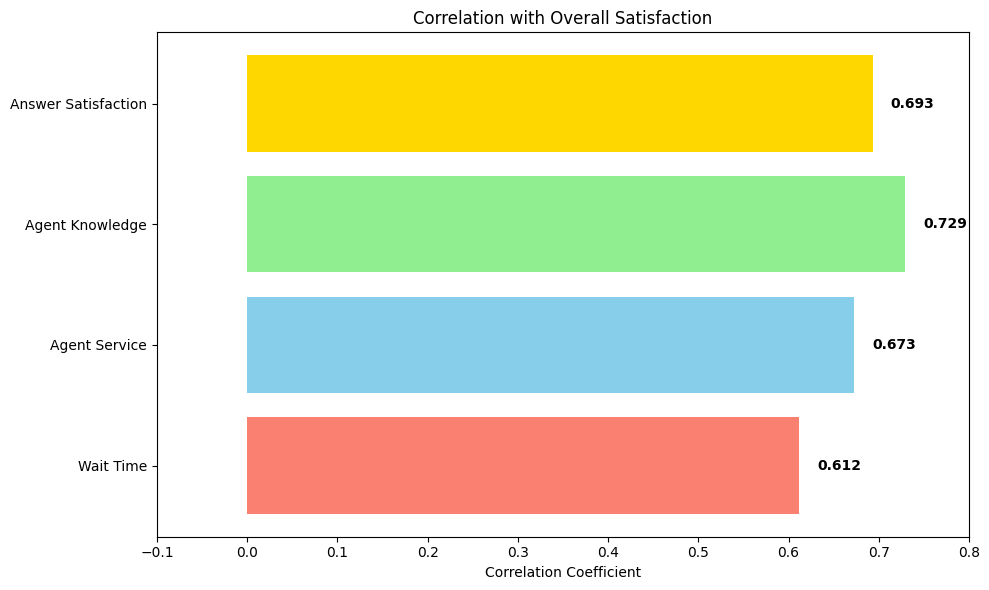

In [30]:

# Map satisfaction ratings to numerical values
rating_map = {
    'Strongly Disagree': 1,
    'Disagree': 2,
    'Neutral': 3,
    'Agree': 4,
    'Strongly Agree': 5
}

# Convert satisfaction columns to numerical values
df['Overall Satisfaction Num'] = df['Overall Satisfaction'].map(rating_map)
df['Wait Time Num'] = df['Wait Time'].map(rating_map)
df['Agent Service Num'] = df['Agent - Customer Service'].map(rating_map)
df['Agent Knowledge Num'] = df['Agent - Job Knowledge'].map(rating_map)
df['Answer Satisfaction Num'] = df['Answer Satisfaction'].map(rating_map)

# List of factors to analyze
factors = ['Wait Time Num', 'Agent Service Num', 'Agent Knowledge Num', 'Answer Satisfaction Num']
factor_names = ['Wait Time', 'Agent Service', 'Agent Knowledge', 'Answer Satisfaction']

# Calculate correlations with Overall Satisfaction
correlations = [df['Overall Satisfaction Num'].corr(df[factor]) for factor in factors]

# Plot horizontal bar chart with right-aligned value labels
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.barh(factor_names, correlations, color=['salmon', 'skyblue', 'lightgreen', 'gold'])

# Add value labels just right of each bar, vertically centered
for bar, value in zip(bars, correlations):
    ax.text(bar.get_width() + 0.02,                   # Slightly to the right of bar end
            bar.get_y() + bar.get_height() / 2,       # Vertically centered
            f"{value:.3f}",                            # Format value with 3 decimals
            va='center', ha='left',                    # Align left horizontally, centered vertically
            fontsize=10, fontweight='bold')

# Set labels and title
ax.set_xlabel('Correlation Coefficient')
ax.set_title('Correlation with Overall Satisfaction')
ax.set_xlim(-0.1, 0.8)  # Adjust limits to leave space for text labels

plt.tight_layout()
plt.show()


### **Conclusion** ###

The customer satisfaction analysis reveals that agent knowledge, answer quality, and service experience are the most critical
drivers of customer satisfaction. While reducing wait time also matters, the results emphasize that companies should prioritize
agent training programs and improve the accuracy and helpfulness of responses to maximize overallsatisfaction. This approach will
likely have the most significant impact on loyalty and positive customer experiences.